In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("query-monthall.csv")

In [75]:
df.size

61920

In [72]:
df.columns

Index(['bvs_job_id', 'SECONDS', 'job_option_id', 'request_entered_timestamp',
       'requester_uuid', 'start_date', 'end_date', 'QUERY_RANGE_HOURS', 'caid',
       'requester_firm_id', 'requester_account_id', 'hits'],
      dtype='object')

In [73]:
df["job_option_id"].unique()

array([nan,  4.,  7., 51.,  5.,  6., 43., 33., 12., 28., 23., 34.])

In [76]:
df = df[df["job_option_id"].isin([51,48,7])]

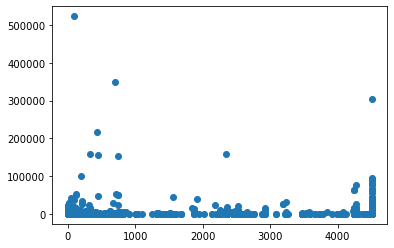

In [77]:
sct = plt.scatter(x=df["QUERY_RANGE_HOURS"], y = df["hits"])


In [78]:
#search record off points
df[(df.hits > 200000)]

,bvs_job_id,SECONDS,job_option_id,request_entered_timestamp,requester_uuid,start_date,end_date,QUERY_RANGE_HOURS,caid,requester_firm_id,requester_account_id,hits
12831,V2XX586183DAA82667000076,381,51.0,2021-11-04 13:05:43,25877600.0,2021-10-14 03:59:59,2021-11-01 03:59:59,432.0,-1.0,1270,30515802,216120.0
19281,V2XX58618C847639DA00023E,36667,7.0,2021-11-11 02:48:22,30825925.0,2021-10-08 00:00:00,2021-10-11 23:59:59,95.0,-1.0,1690,696680,522981.0
20415,V2XX58618D4AFE0E9D0001A7,68689,7.0,2021-11-11 16:55:25,22380198.0,2021-01-01 05:00:00,2021-07-08 04:59:59,4511.0,-1.0,69466,79994,303325.0
23984,V2XX58619374C539DF000150,53850,7.0,2021-11-16 09:07:16,11406000.0,2015-08-01 19:30:00,2015-08-30 19:29:59,695.0,17690.0,1999,30314488,348546.0


In [67]:
df[(df.QUERY_RANGE_HOURS > 4500)][['QUERY_RANGE_HOURS','hits']]


,QUERY_RANGE_HOURS,hits
25,4511.0,66201.0
41,4511.0,0.0
57,4511.0,0.0
72,4511.0,0.0
87,4511.0,0.0
...,...,...
26356,4511.0,2450.0
26357,4511.0,3275.0
26358,4511.0,2295.0
26359,4511.0,2320.0


<AxesSubplot:xlabel='QUERY_RANGE_HOURS', ylabel='hits'>

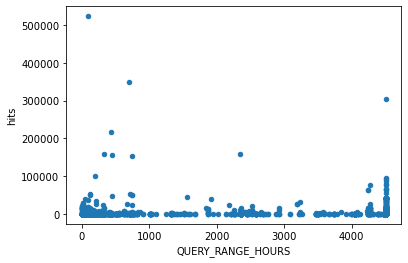

In [47]:
df.plot("QUERY_RANGE_HOURS", "hits" ,kind = 'scatter')

<AxesSubplot:xlabel='QUERY_RANGE_HOURS', ylabel='caid'>

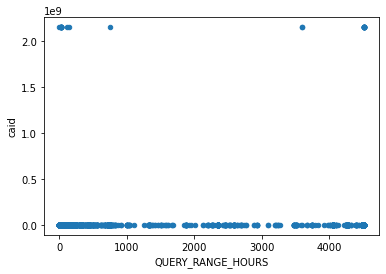

In [68]:
df.plot("QUERY_RANGE_HOURS", "caid" ,kind = 'scatter')

In [87]:
df.requester_firm_id.unique()

array(['9001', '81788', '3617', '1584', '12141', '1690', '470358',
       '935251', '3287', '65607', '1315', '3684', '11527', '853622',
       '1113', '5165', '3063', '18197', '1625', '516769', '3729', '1647',
       '854822', '2269', '2194', '249065', '150616', '5680', '954424',
       '1726', '33915', '1944', '3673', '11129', '16124', '2134',
       '163130', '45779', '23558', '13737', '2325', '1189', '41710',
       '225712', '842471', '160934', '1999', '64966', '835758', '116205',
       '3798', '34951', '855783', '2164', '14263', '909061', '1328',
       '1381', '8055', '895114', '2553', '60466', '37912', '7561', '1347',
       '298683', '1137', '864269', '14675', '5911', '165777', '4151',
       '16270', '29385', '96076', '3676', '1696', '123133', '1270',
       '69466', '874944', '1583', '411142', '35170', '11264', '11145',
       '3679', '20470', '2592', '5647', '1402', '162849', '11645',
       '19687', '16013', '48823', '8741', '15253', '1988', '4136',
       '244955', '1284'

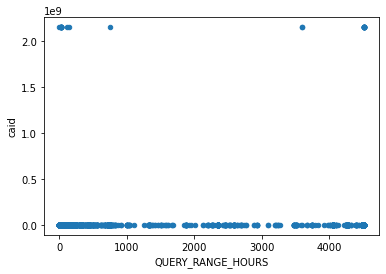

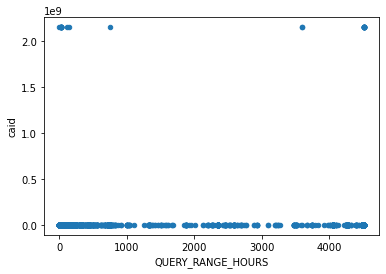

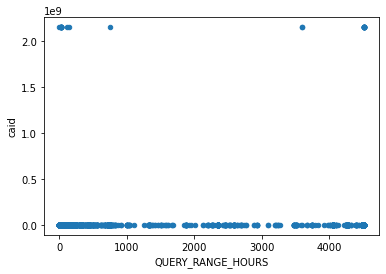

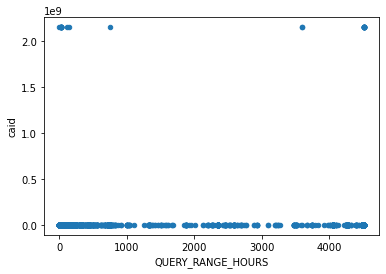

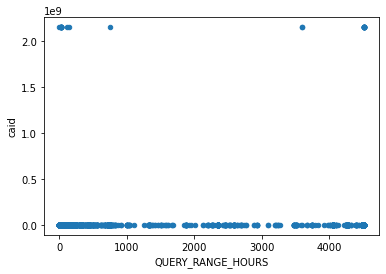

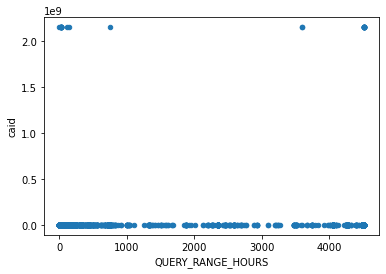

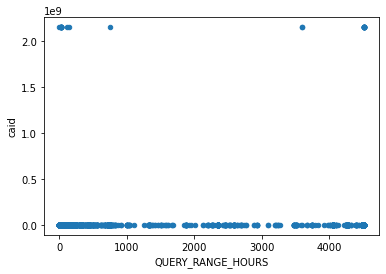

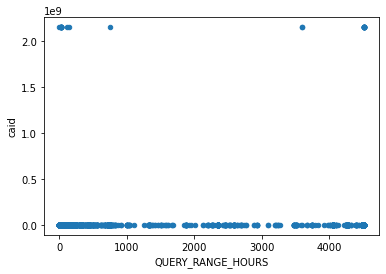

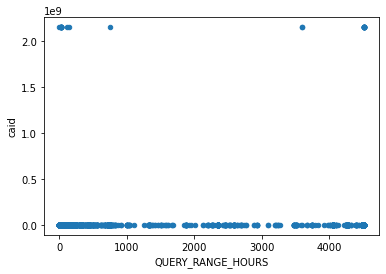

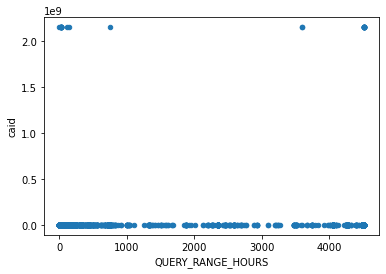

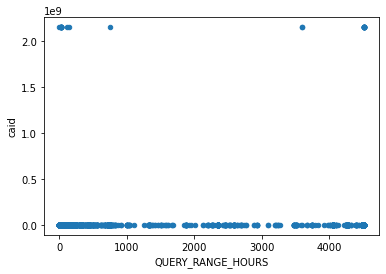

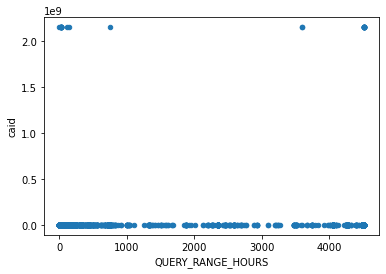

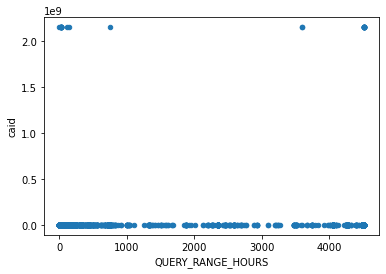

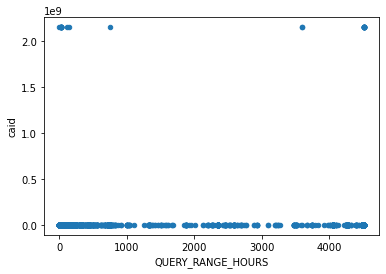

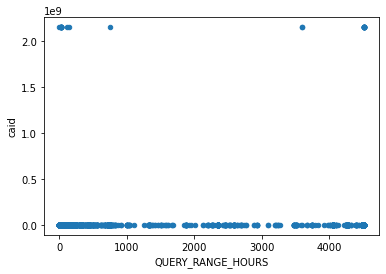

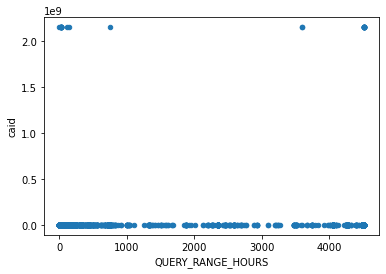

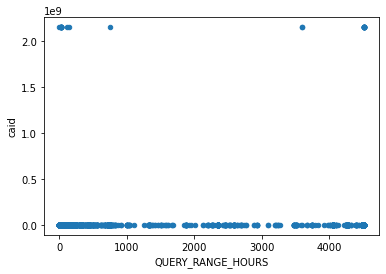

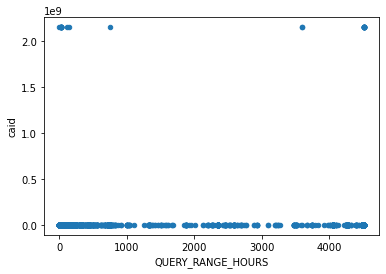

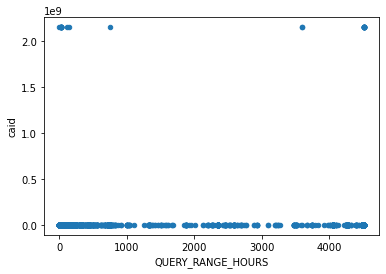

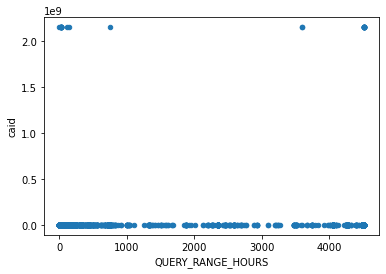

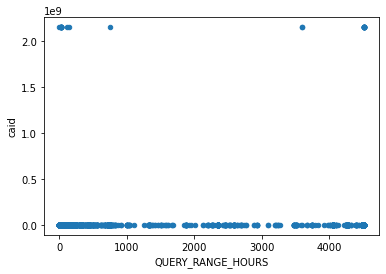

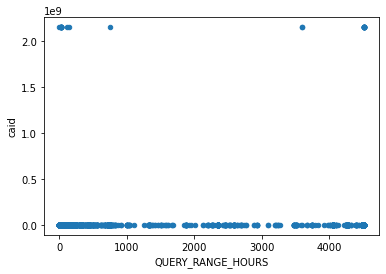

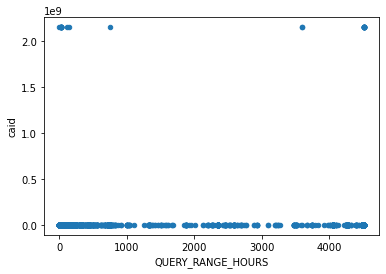

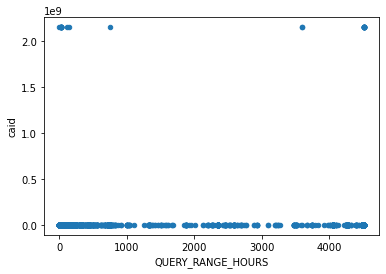

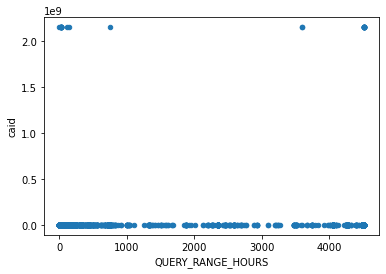

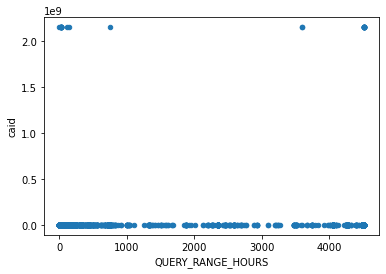

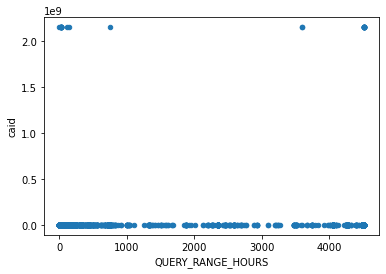

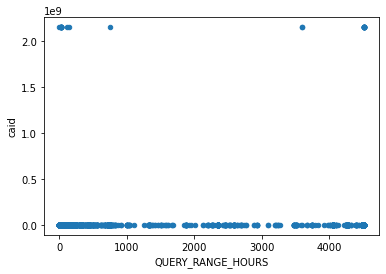

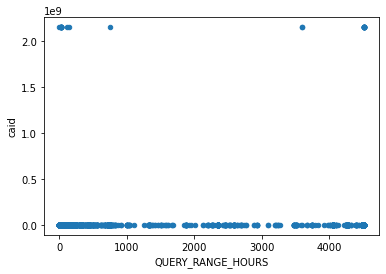

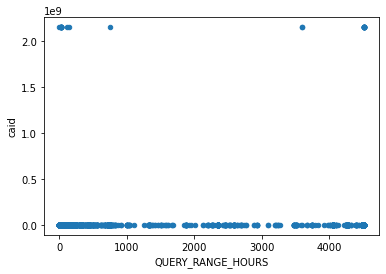

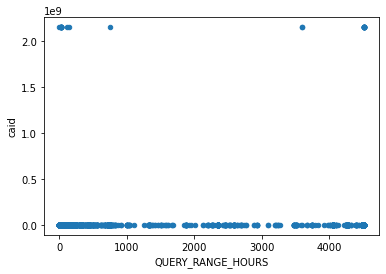

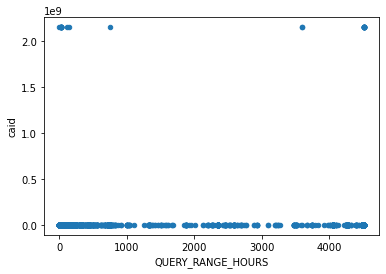

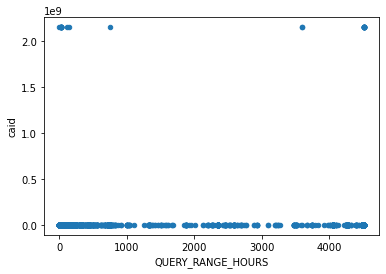

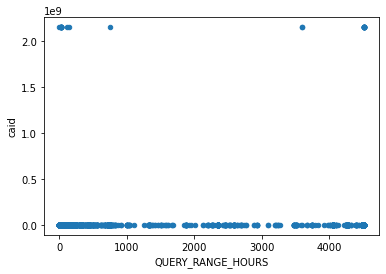

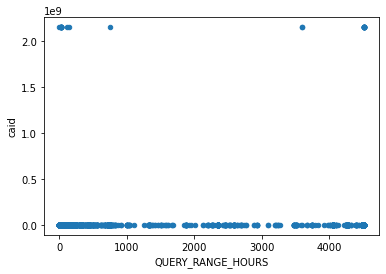

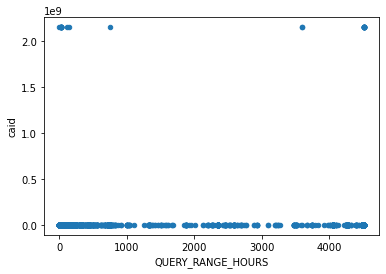

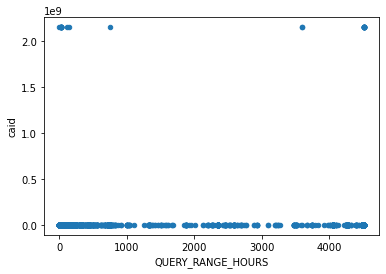

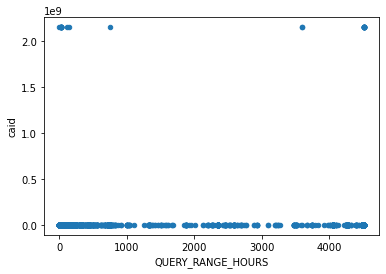

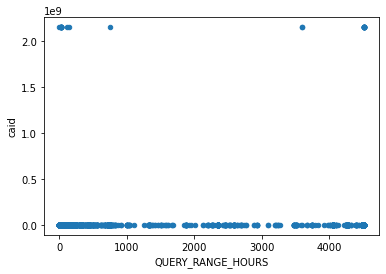

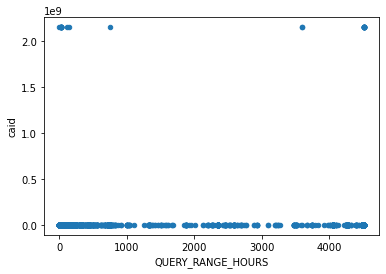

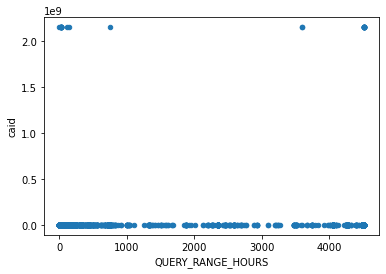

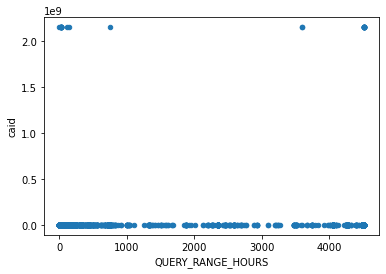

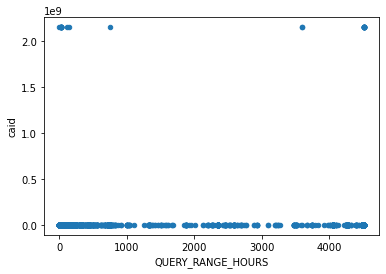

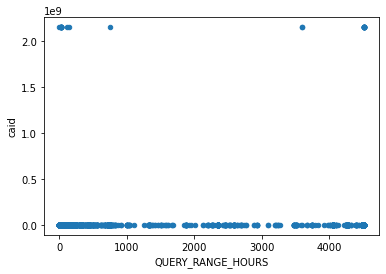

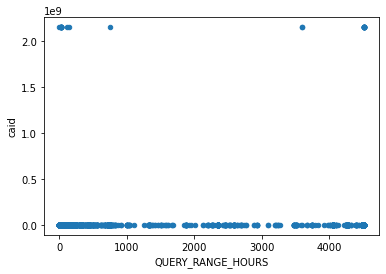

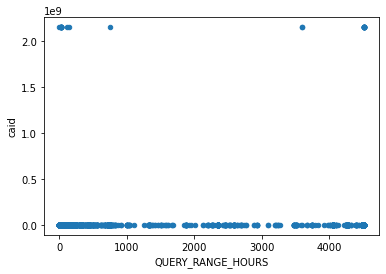

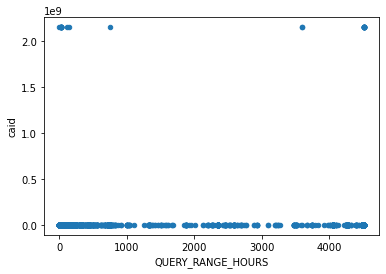

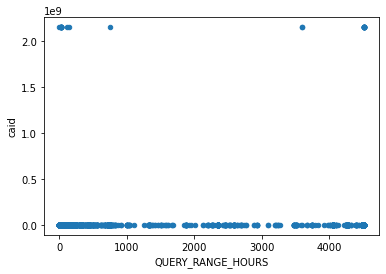

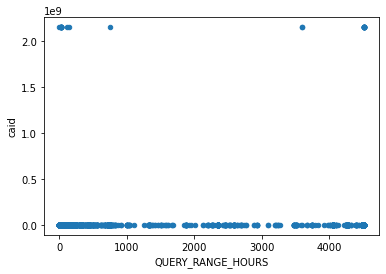

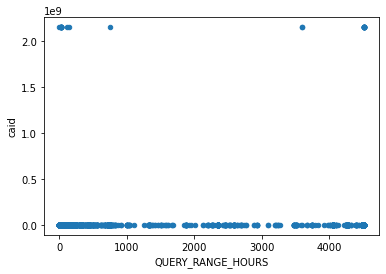

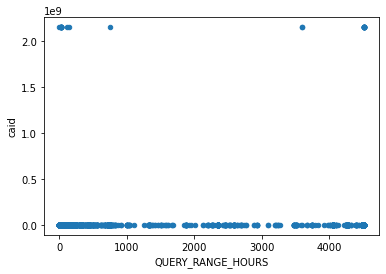

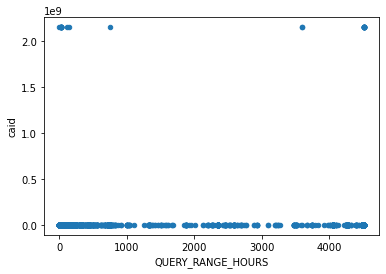

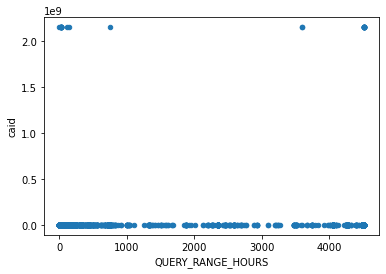

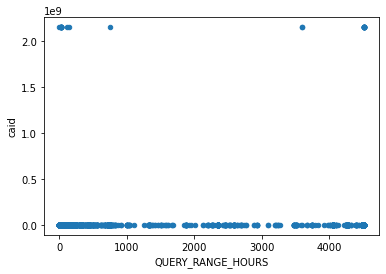

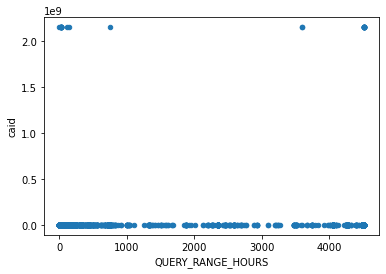

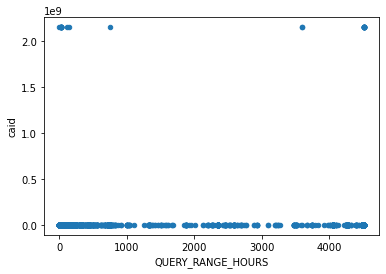

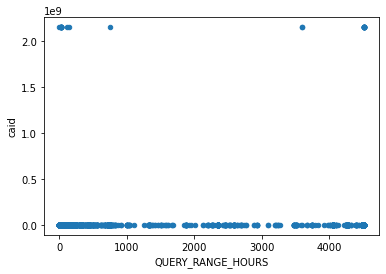

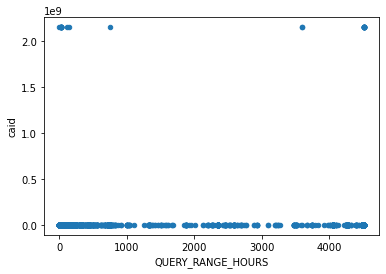

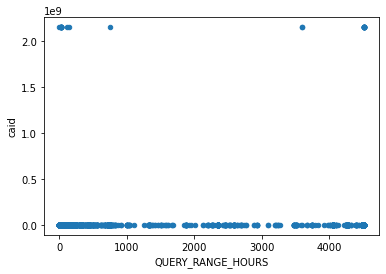

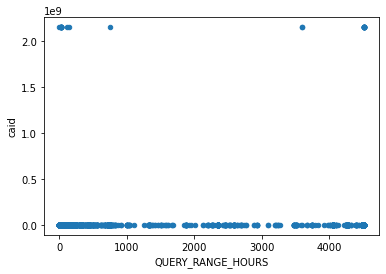

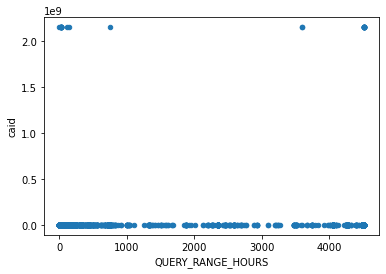

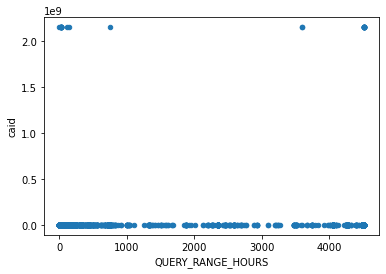

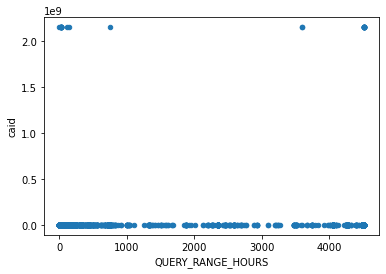

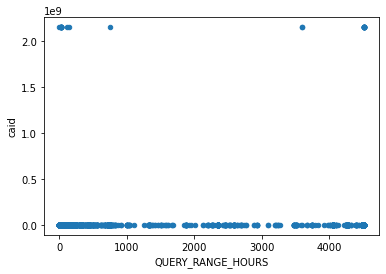

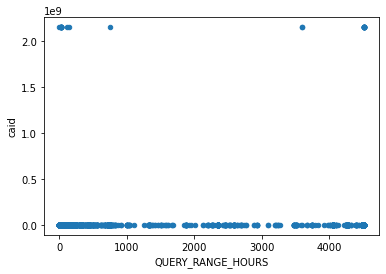

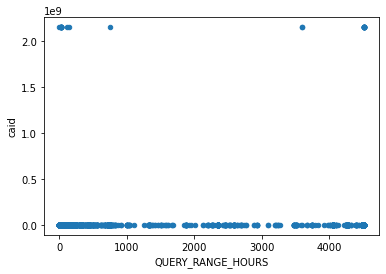

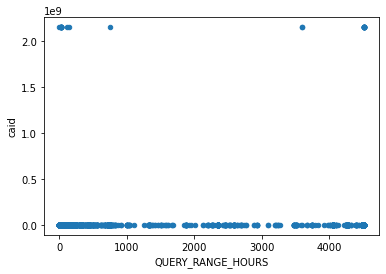

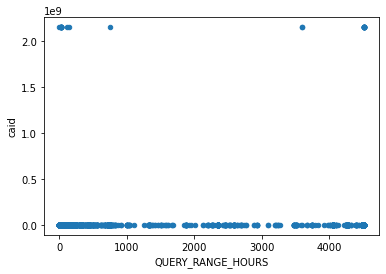

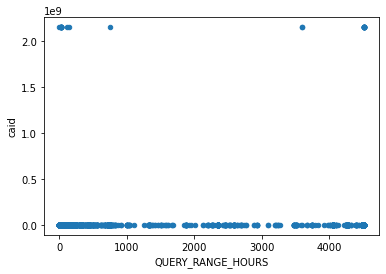

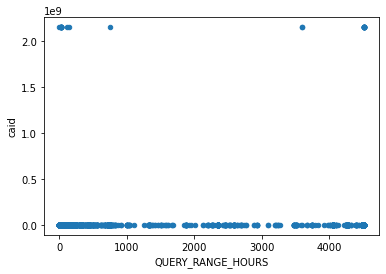

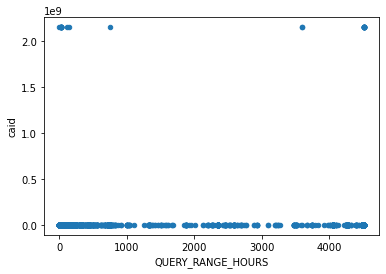

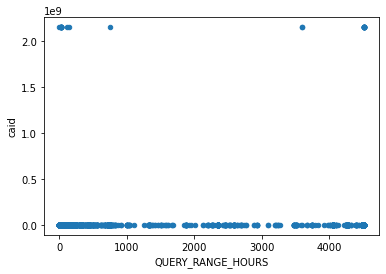

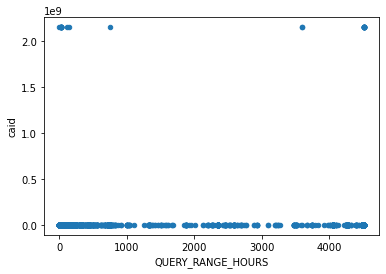

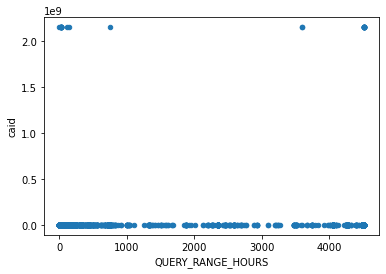

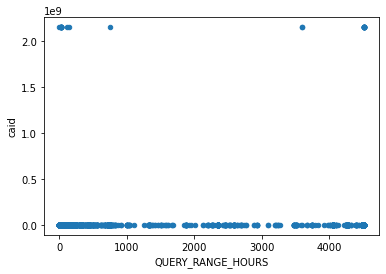

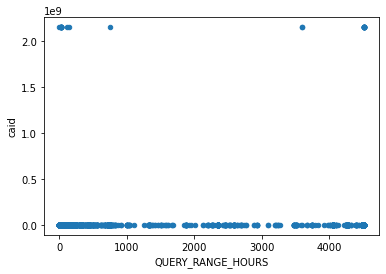

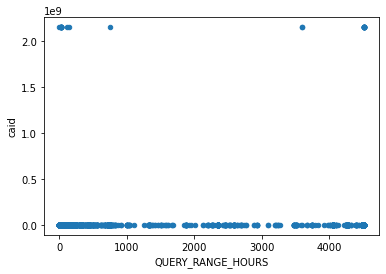

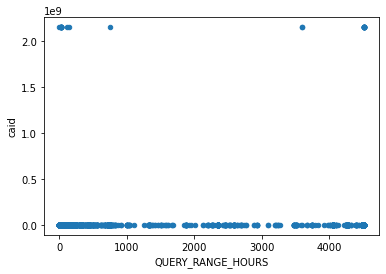

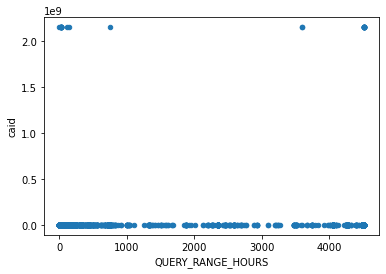

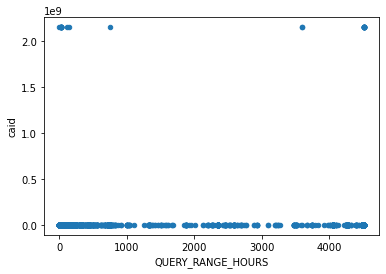

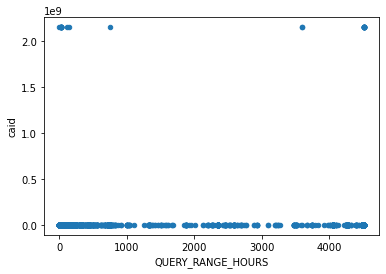

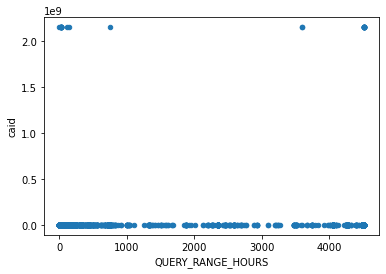

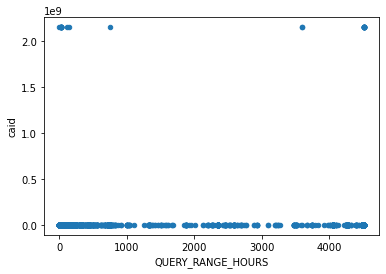

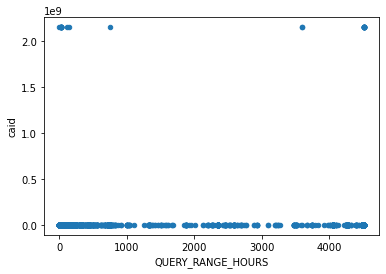

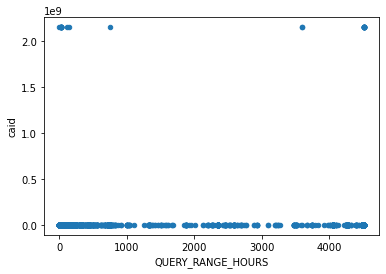

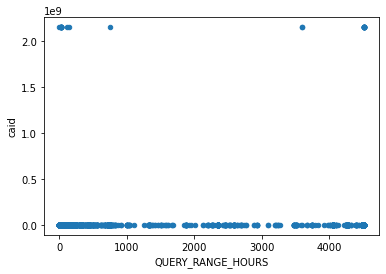

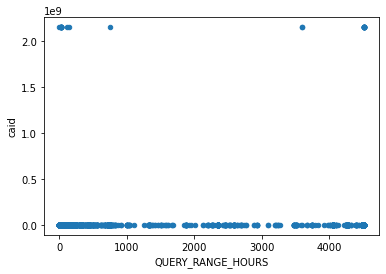

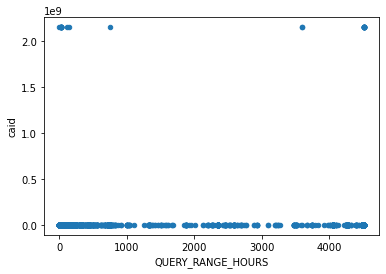

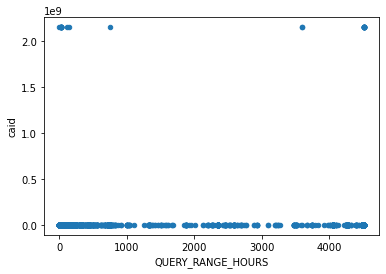

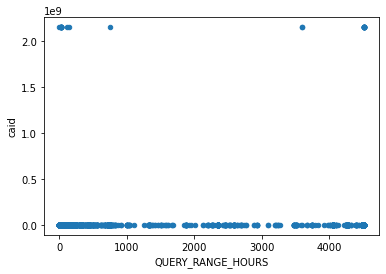

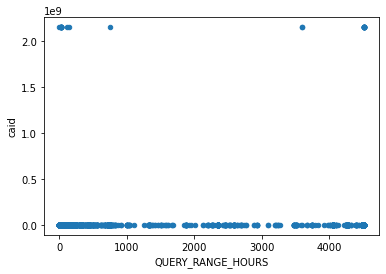

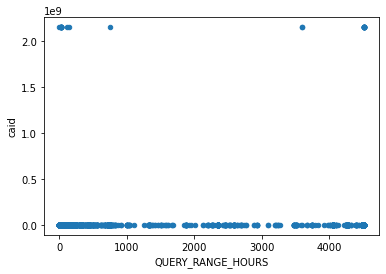

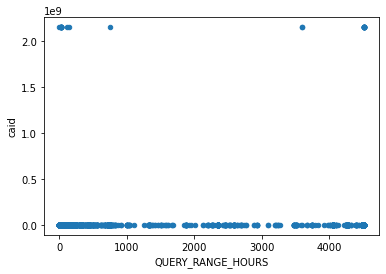

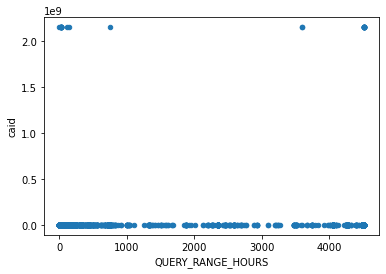

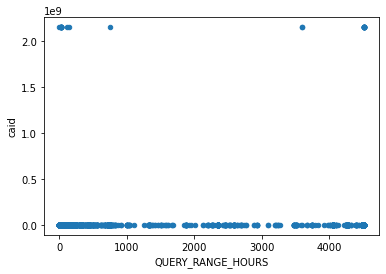

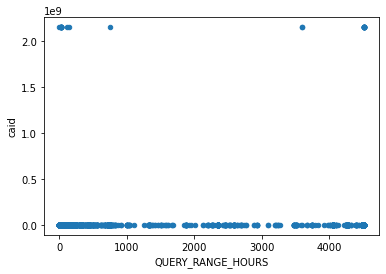

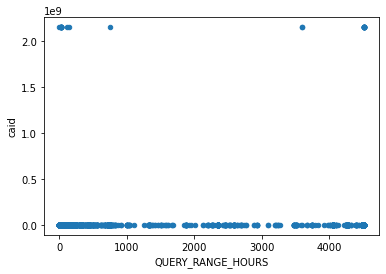

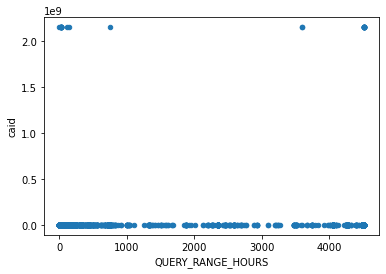

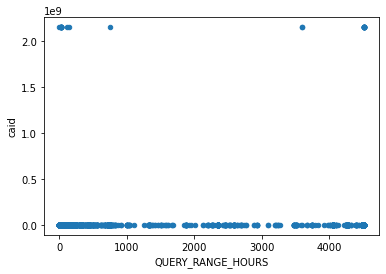

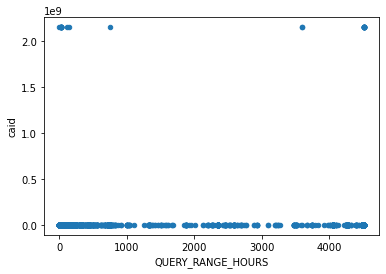

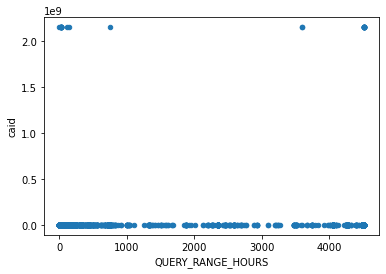

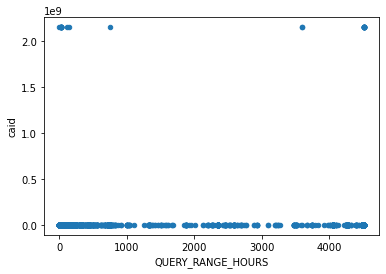

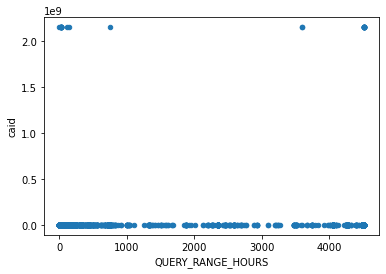

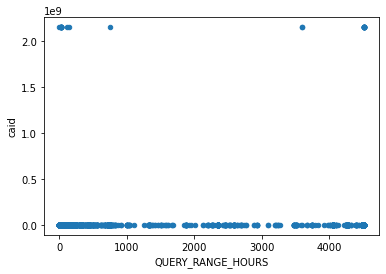

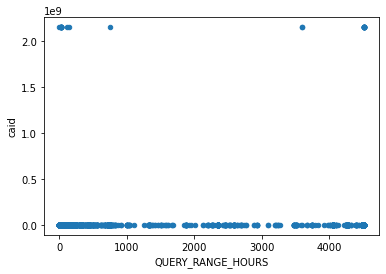

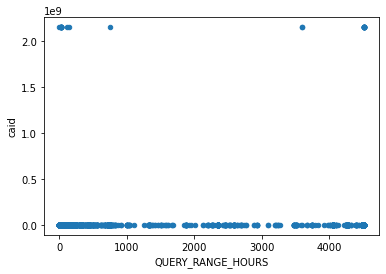

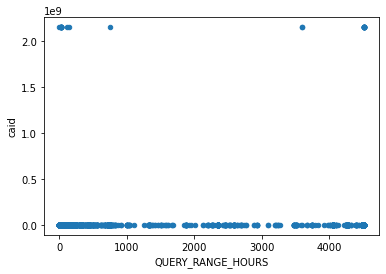

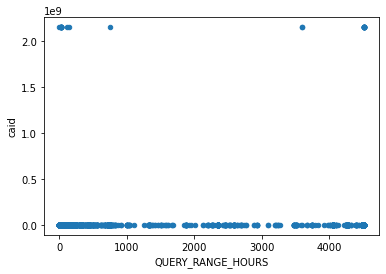

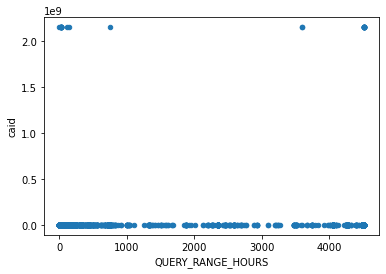

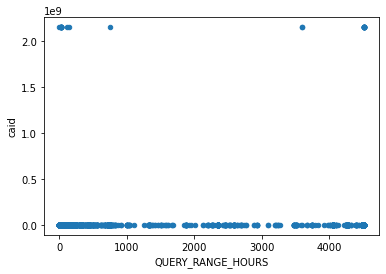

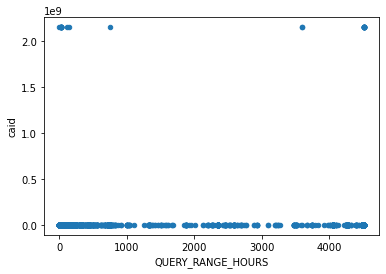

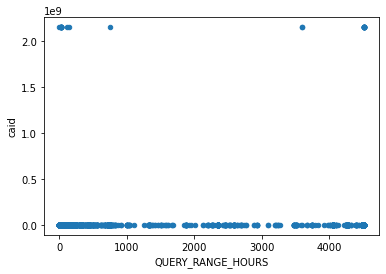

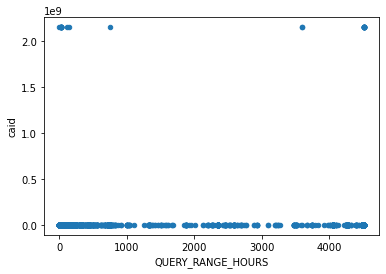

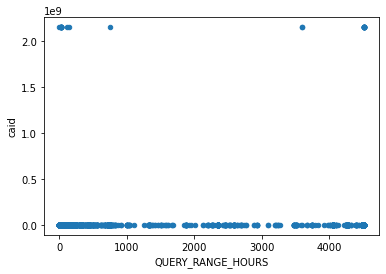

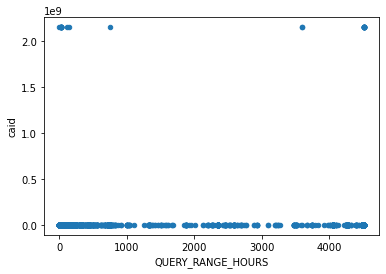

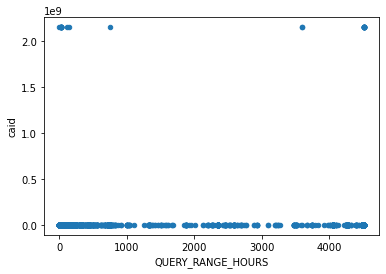

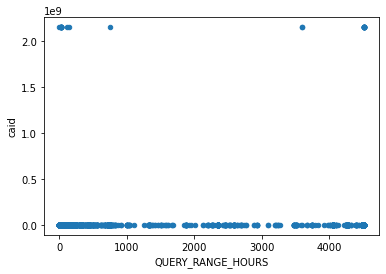

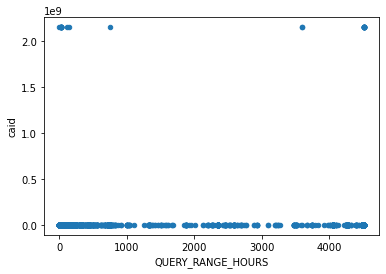

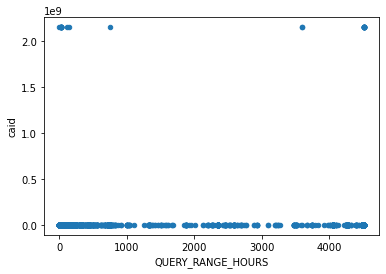

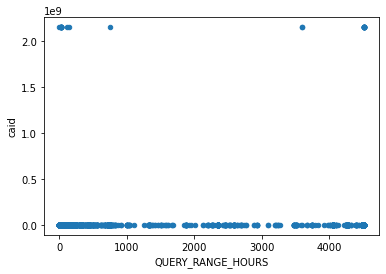

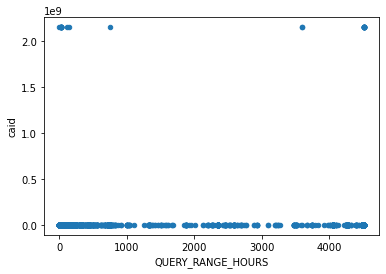

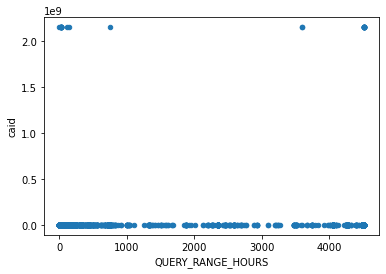

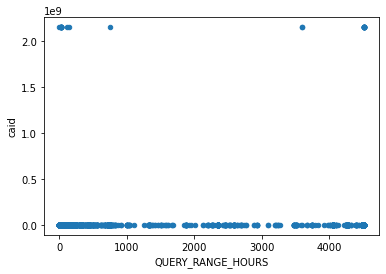

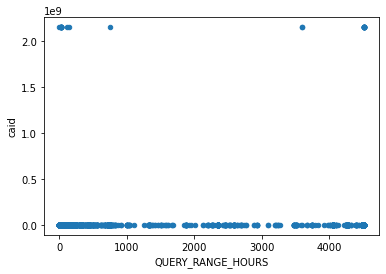

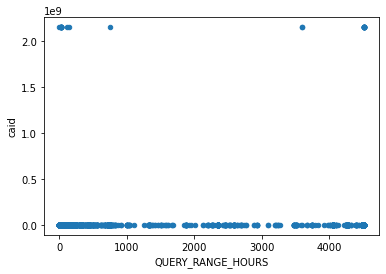

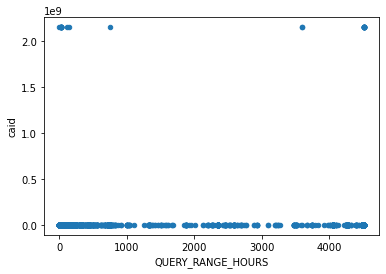

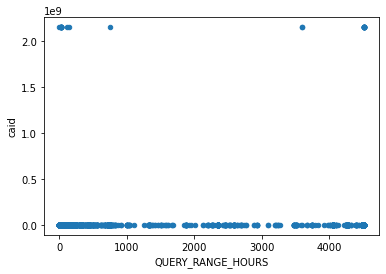

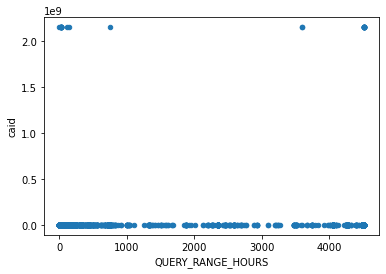

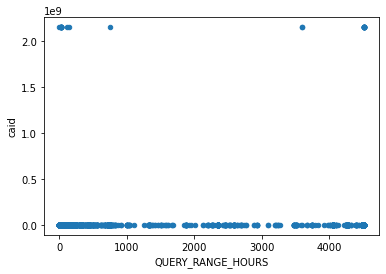

In [98]:
for firm in df.caid.unique():
    firm_df = df[df.requester_firm_id == firm]
    if firm_df.shape[0] > 50: continue
    df.plot("QUERY_RANGE_HOURS", "caid" ,kind = 'scatter')

In [91]:
df.caid.unique().size

129

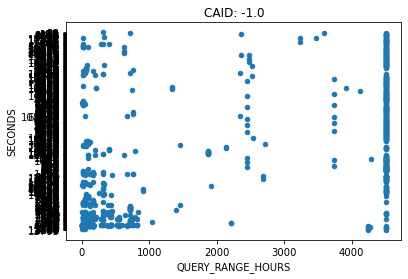

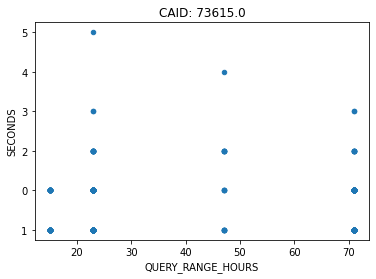

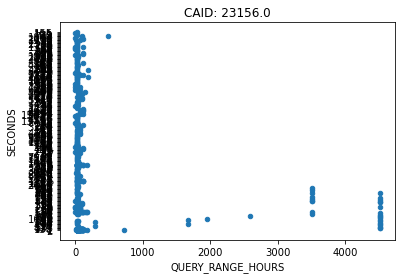

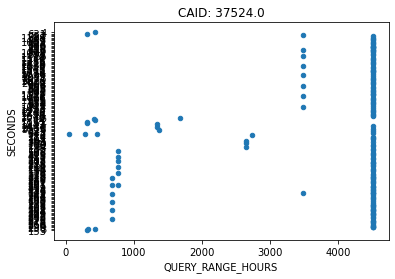

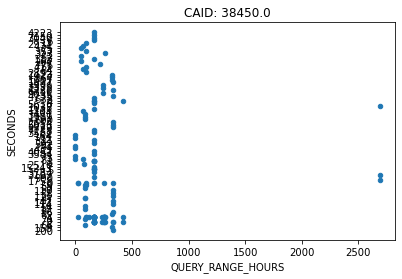

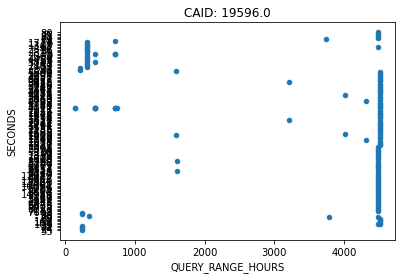

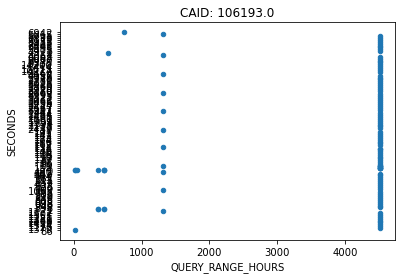

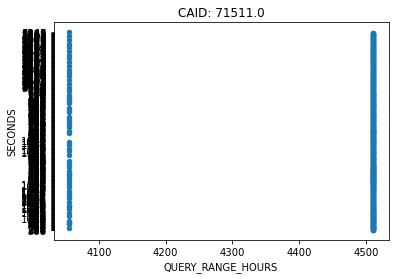

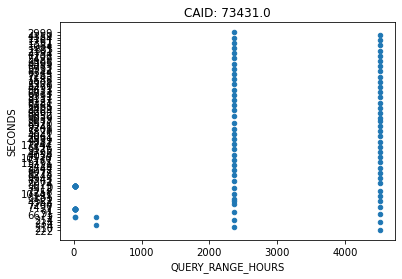

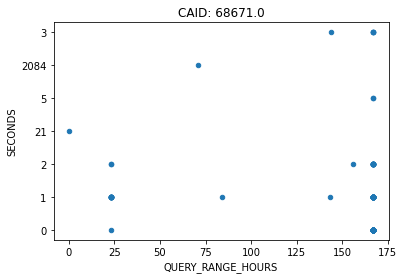

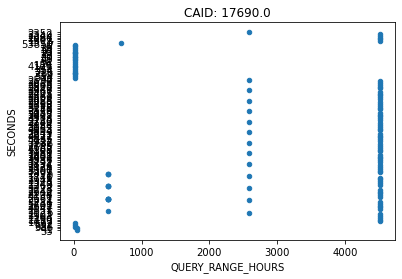

In [96]:
#after grouping each caid 
for caid in df['caid'].unique():
    caid_df = df[df.caid == caid]
    # skip if there are less than 10 results
    if caid_df.shape[0] < 100: continue 
    caid_df.plot("QUERY_RANGE_HOURS", "SECONDS", kind='scatter', title=f'CAID: {caid}')

<AxesSubplot:title={'center':'CAID: 23364.0'}, xlabel='caid', ylabel='SECONDS'>

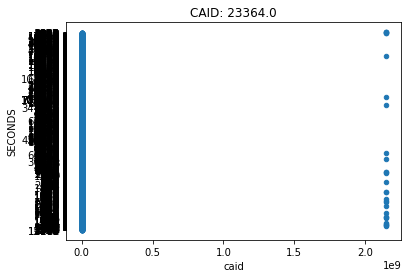

In [101]:
df.plot( "caid", "SECONDS", kind='scatter', title=f'CAID: {caid}')

In [104]:
df.caid.unique().size

129